In [1]:
# NLPL Project using Business dataset from Yelp

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
import nltk

In [5]:
df = pd.read_csv('yelp.csv')

In [6]:
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [7]:
df.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [9]:
df

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,VY_tvNUCCXGXQeSvJl757Q,2012-07-28,Ubyfp2RSDYW0g7Mbr8N3iA,3,First visit...Had lunch here today - used my G...,review,_eqQoPtQ3e3UxLE4faT6ow,1,2,0
9996,EKzMHI1tip8rC1-ZAy64yg,2012-01-18,2XyIOQKbVFb6uXQdJ0RzlQ,4,Should be called house of deliciousness!\n\nI ...,review,ROru4uk5SaYc3rg8IU7SQw,0,0,0
9997,53YGfwmbW73JhFiemNeyzQ,2010-11-16,jyznYkIbpqVmlsZxSDSypA,4,I recently visited Olive and Ivy for business ...,review,gGbN1aKQHMgfQZkqlsuwzg,0,0,0
9998,9SKdOoDHcFoxK5ZtsgHJoA,2012-12-02,5UKq9WQE1qQbJ0DJbc-B6Q,2,My nephew just moved to Scottsdale recently so...,review,0lyVoNazXa20WzUyZPLaQQ,0,0,0


In [10]:
df['text length'] = df['text'].apply(len)

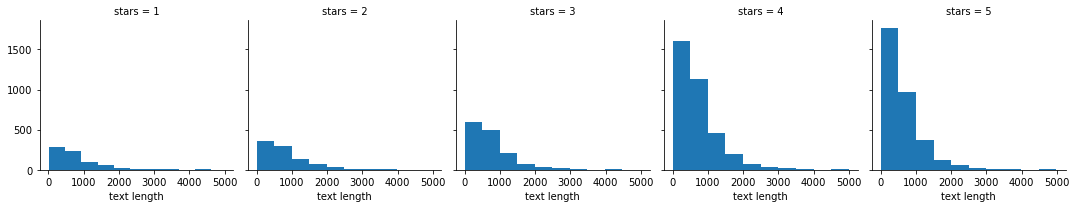

In [11]:
g = sns.FacetGrid(df,col='stars')
g.map(plt.hist,'text length')

In [12]:
#From here, it can be seen as the mean of length of words increases as the number of stars decreases.

<AxesSubplot:xlabel='stars', ylabel='text length'>

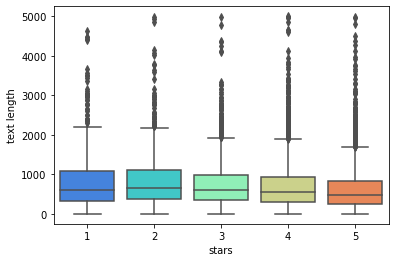

In [13]:
sns.boxplot(x='stars',y='text length',data=df,palette='rainbow')

<AxesSubplot:xlabel='stars', ylabel='count'>

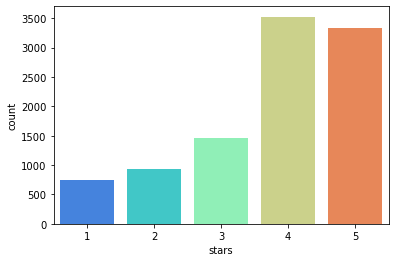

In [14]:
sns.countplot(x='stars',data=df,palette='rainbow')

In [15]:
#From here, it can be seen that '4 stars' is the modal value of the data.

In [16]:
df_gp = df.groupby('stars').mean()

In [17]:
df_gp

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [18]:
df_gp.corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000


<AxesSubplot:>

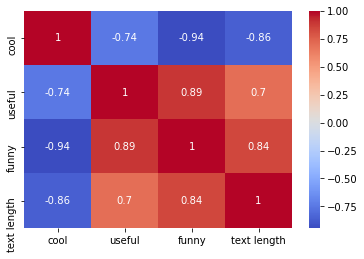

In [19]:
sns.heatmap(df_gp.corr(),cmap='coolwarm', annot= True)

In [20]:
df['type'].value_counts()

review    10000
Name: type, dtype: int64

In [21]:
df

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469
...,...,...,...,...,...,...,...,...,...,...,...
9995,VY_tvNUCCXGXQeSvJl757Q,2012-07-28,Ubyfp2RSDYW0g7Mbr8N3iA,3,First visit...Had lunch here today - used my G...,review,_eqQoPtQ3e3UxLE4faT6ow,1,2,0,668
9996,EKzMHI1tip8rC1-ZAy64yg,2012-01-18,2XyIOQKbVFb6uXQdJ0RzlQ,4,Should be called house of deliciousness!\n\nI ...,review,ROru4uk5SaYc3rg8IU7SQw,0,0,0,881
9997,53YGfwmbW73JhFiemNeyzQ,2010-11-16,jyznYkIbpqVmlsZxSDSypA,4,I recently visited Olive and Ivy for business ...,review,gGbN1aKQHMgfQZkqlsuwzg,0,0,0,1425
9998,9SKdOoDHcFoxK5ZtsgHJoA,2012-12-02,5UKq9WQE1qQbJ0DJbc-B6Q,2,My nephew just moved to Scottsdale recently so...,review,0lyVoNazXa20WzUyZPLaQQ,0,0,0,880


In [22]:
df_new = df[['stars', 'text', 'cool', 'useful', 'funny', 'text length']]

In [23]:
df_new

,stars,text,cool,useful,funny,text length
0,5,My wife took me here on my birthday for breakf...,2,5,0,889
1,5,I have no idea why some people give bad review...,0,0,0,1345
2,4,love the gyro plate. Rice is so good and I als...,0,1,0,76
3,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",1,2,0,419
4,5,General Manager Scott Petello is a good egg!!!...,0,0,0,469
...,...,...,...,...,...,...
9995,3,First visit...Had lunch here today - used my G...,1,2,0,668
9996,4,Should be called house of deliciousness!\n\nI ...,0,0,0,881
9997,4,I recently visited Olive and Ivy for business ...,0,0,0,1425
9998,2,My nephew just moved to Scottsdale recently so...,0,0,0,880


In [24]:
#Using only the text for the review analysis:
X = df_new['text']
y = df_new['stars']
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(X)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [26]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [27]:
nb.fit(X_train,y_train)

MultinomialNB()

In [28]:
predictions = nb.predict(X_test)

In [29]:
from sklearn.metrics import confusion_matrix,classification_report

In [30]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[ 57  35  12  79  37]
 [ 12  20  33 180  28]
 [  6   8  36 350  43]
 [  6   4  21 775 258]
 [  5   5   9 446 535]]


              precision    recall  f1-score   support

           1       0.66      0.26      0.37       220
           2       0.28      0.07      0.12       273
           3       0.32      0.08      0.13       443
           4       0.42      0.73      0.54      1064
           5       0.59      0.54      0.56      1000

    accuracy                           0.47      3000
   macro avg       0.46      0.34      0.34      3000
weighted avg       0.47      0.47      0.43      3000



In [31]:
from sklearn.svm import SVC
svc_model = SVC()

In [32]:
svc_model.fit(X_train, y_train)
predictions = svc_model.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(predictions, y_test))
print('\n')
print(classification_report(predictions, y_test))

[[ 49  16   5   1   4]
 [ 11  18   3   3   1]
 [  4  16  32   8   1]
 [ 69 175 318 676 327]
 [ 87  48  85 376 667]]


              precision    recall  f1-score   support

           1       0.22      0.65      0.33        75
           2       0.07      0.50      0.12        36
           3       0.07      0.52      0.13        61
           4       0.64      0.43      0.51      1565
           5       0.67      0.53      0.59      1263

    accuracy                           0.48      3000
   macro avg       0.33      0.53      0.34      3000
weighted avg       0.62      0.48      0.53      3000



In [33]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 
grid = GridSearchCV(SVC(kernel = 'rbf'),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print('\n')
print(classification_report(y_test,grid_predictions))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................... C=0.1, gamma=1, total=  33.1s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   33.0s remaining:    0.0s


[CV] ................................... C=0.1, gamma=1, total=  32.5s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=  32.7s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=  32.7s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=  32.9s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=  32.2s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=  33.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=  33.2s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .

[CV] ................................ C=10, gamma=0.001, total=  24.1s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=  35.5s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=  35.5s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=  35.4s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=  35.0s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=  35.2s
[CV] C=100, gamma=0.1 ................................................
[CV] ................................. C=100, gamma=0.1, total=  34.8s
[CV] C=100, gamma=0.1 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed: 42.0min finished


[[ 93  49  12  22  44]
 [ 36  79  63  64  31]
 [ 14  38 130 184  77]
 [  9  20  88 586 361]
 [ 15  16  25 272 672]]


              precision    recall  f1-score   support

           1       0.56      0.42      0.48       220
           2       0.39      0.29      0.33       273
           3       0.41      0.29      0.34       443
           4       0.52      0.55      0.53      1064
           5       0.57      0.67      0.62      1000

    accuracy                           0.52      3000
   macro avg       0.49      0.45      0.46      3000
weighted avg       0.51      0.52      0.51      3000



In [34]:
from sklearn.model_selection import GridSearchCV
param_grid_lin = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 
grid_lin = GridSearchCV(SVC(kernel = 'linear'),param_grid_lin,refit=True,verbose=2)
grid_lin.fit(X_train,y_train)
grid_predictions_lin = grid_lin.predict(X_test)
print(confusion_matrix(y_test,grid_predictions_lin))
print('\n')
print(classification_report(y_test,grid_predictions_lin))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................... C=0.1, gamma=1, total=  21.8s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   21.7s remaining:    0.0s


[CV] ................................... C=0.1, gamma=1, total=  20.2s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=  21.6s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=  20.3s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=  22.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=  22.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=  20.5s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=  22.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .

[CV] ................................ C=10, gamma=0.001, total=  26.0s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=  26.7s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=  25.5s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=  27.4s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=  24.2s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=  24.7s
[CV] C=100, gamma=0.1 ................................................
[CV] ................................. C=100, gamma=0.1, total=  24.5s
[CV] C=100, gamma=0.1 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed: 30.9min finished


[[104  53  15  24  24]
 [ 48  96  67  45  17]
 [ 24  66 162 136  55]
 [ 21  33 137 544 329]
 [ 15  27  53 314 591]]


              precision    recall  f1-score   support

           1       0.49      0.47      0.48       220
           2       0.35      0.35      0.35       273
           3       0.37      0.37      0.37       443
           4       0.51      0.51      0.51      1064
           5       0.58      0.59      0.59      1000

    accuracy                           0.50      3000
   macro avg       0.46      0.46      0.46      3000
weighted avg       0.50      0.50      0.50      3000



In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
d_tree = DecisionTreeClassifier()
d_tree.fit(X_train, y_train)
predictions = d_tree.predict(X_test)
print(classification_report(predictions, y_test))
print('\n')
print(confusion_matrix(predictions, y_test))

              precision    recall  f1-score   support

           1       0.22      0.25      0.23       189
           2       0.11      0.12      0.12       244
           3       0.22      0.23      0.23       414
           4       0.43      0.42      0.42      1094
           5       0.48      0.46      0.47      1059

    accuracy                           0.37      3000
   macro avg       0.29      0.30      0.29      3000
weighted avg       0.38      0.37      0.38      3000



[[ 48  43  31  42  25]
 [ 37  30  46  62  69]
 [ 36  71  97 144  66]
 [ 48  73 160 456 357]
 [ 51  56 109 360 483]]


In [34]:
print(X)

  (0, 17130)	2
  (0, 28506)	1
  (0, 26448)	1
  (0, 16151)	1
  (0, 12364)	2
  (0, 17983)	3
  (0, 3059)	1
  (0, 10407)	1
  (0, 3643)	1
  (0, 1453)	8
  (0, 13790)	9
  (0, 28165)	8
  (0, 9339)	3
  (0, 26035)	10
  (0, 28264)	1
  (0, 19025)	1
  (0, 28411)	1
  (0, 15613)	2
  (0, 23477)	1
  (0, 18269)	1
  (0, 18342)	1
  (0, 26049)	4
  (0, 11710)	1
  (0, 1429)	1
  (0, 668)	1
  :	:
  (9999, 9776)	1
  (9999, 9700)	1
  (9999, 18088)	1
  (9999, 26468)	1
  (9999, 5113)	1
  (9999, 2196)	1
  (9999, 281)	1
  (9999, 16519)	1
  (9999, 15182)	2
  (9999, 13793)	1
  (9999, 21936)	1
  (9999, 13811)	1
  (9999, 24585)	1
  (9999, 15277)	1
  (9999, 10089)	1
  (9999, 3329)	1
  (9999, 16570)	1
  (9999, 291)	1
  (9999, 24311)	1
  (9999, 3865)	1
  (9999, 18711)	1
  (9999, 863)	1
  (9999, 14632)	1
  (9999, 8386)	1
  (9999, 1303)	1


In [35]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = 50)
KNN.fit(X_train, y_train)
predictions = KNN.predict(X_test)
print(confusion_matrix(predictions, y_test))
print('\n')
print(classification_report(predictions, y_test))

[[  2   0   0   0   0]
 [  1   0   0   1   0]
 [  3   4   6   9   2]
 [109 167 244 499 325]
 [105 102 193 555 673]]


              precision    recall  f1-score   support

           1       0.01      1.00      0.02         2
           2       0.00      0.00      0.00         2
           3       0.01      0.25      0.03        24
           4       0.47      0.37      0.41      1344
           5       0.67      0.41      0.51      1628

    accuracy                           0.39      3000
   macro avg       0.23      0.41      0.19      3000
weighted avg       0.58      0.39      0.46      3000



In [36]:
from sklearn.linear_model import LogisticRegression
logR = LogisticRegression(max_iter=1000)
logR.fit(X_train, y_train)
predictions = logR.predict(X_test)
print(classification_report(predictions, y_test))
print('\n')
print(confusion_matrix(predictions, y_test))

              precision    recall  f1-score   support

           1       0.43      0.54      0.48       175
           2       0.33      0.39      0.36       231
           3       0.37      0.39      0.38       426
           4       0.52      0.50      0.51      1105
           5       0.59      0.56      0.57      1063

    accuracy                           0.50      3000
   macro avg       0.45      0.48      0.46      3000
weighted avg       0.51      0.50      0.50      3000



[[ 95  37  20  13  10]
 [ 53  90  49  19  20]
 [ 23  78 166 121  38]
 [ 21  45 146 554 339]
 [ 28  23  62 357 593]]


In [54]:
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM


In [38]:
X_train.shape

(7000, 29185)

In [39]:
#Using tfidf to normalize the inputs.
#First of all I'll be using bow for classification.
#Then word embeddings and sequesntial models.
#1 and 2 stars represents bad review... 3 means the average review and 4, 5 stars represent good review.
#We can also use other data such as cool, useful for further analysis.

In [46]:
from sklearn.feature_extraction.text import  TfidfTransformer
from sklearn.pipeline import Pipeline
pipeline_1 = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])
pipeline_2 = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', SVC()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])


In [47]:
X = df_new['text']
y = df_new['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)
pipeline_1.fit(X_train,y_train)
predictions = pipeline_1.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[  0   0   0 187  33]
 [  0   0   0 266   7]
 [  0   0   1 422  20]
 [  0   0   0 974  90]
 [  0   0   0 708 292]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       220
           2       0.00      0.00      0.00       273
           3       1.00      0.00      0.00       443
           4       0.38      0.92      0.54      1064
           5       0.66      0.29      0.40      1000

    accuracy                           0.42      3000
   macro avg       0.41      0.24      0.19      3000
weighted avg       0.50      0.42      0.33      3000



C:\Users\rasto\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
df_new

,stars,text,cool,useful,funny,text length
0,5,My wife took me here on my birthday for breakf...,2,5,0,889
1,5,I have no idea why some people give bad review...,0,0,0,1345
2,4,love the gyro plate. Rice is so good and I als...,0,1,0,76
3,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",1,2,0,419
4,5,General Manager Scott Petello is a good egg!!!...,0,0,0,469
...,...,...,...,...,...,...
9995,3,First visit...Had lunch here today - used my G...,1,2,0,668
9996,4,Should be called house of deliciousness!\n\nI ...,0,0,0,881
9997,4,I recently visited Olive and Ivy for business ...,0,0,0,1425
9998,2,My nephew just moved to Scottsdale recently so...,0,0,0,880


In [48]:
pipeline_2.fit(X_train,y_train)
predictions = pipeline_2.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[ 71  22   8  72  47]
 [ 18  40  47 144  24]
 [  8  12  73 301  49]
 [  3   3  18 748 292]
 [  1   3   4 359 633]]
              precision    recall  f1-score   support

           1       0.70      0.32      0.44       220
           2       0.50      0.15      0.23       273
           3       0.49      0.16      0.25       443
           4       0.46      0.70      0.56      1064
           5       0.61      0.63      0.62      1000

    accuracy                           0.52      3000
   macro avg       0.55      0.39      0.42      3000
weighted avg       0.53      0.52      0.49      3000



In [49]:
pipeline_3 = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', SVC(kernel = 'linear')),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [50]:
pipeline_3.fit(X_train,y_train)
predictions = pipeline_3.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[105  45  13  34  23]
 [ 38  77  71  72  15]
 [ 13  31 134 218  47]
 [  8   6  58 684 308]
 [  3   6  19 348 624]]
              precision    recall  f1-score   support

           1       0.63      0.48      0.54       220
           2       0.47      0.28      0.35       273
           3       0.45      0.30      0.36       443
           4       0.50      0.64      0.57      1064
           5       0.61      0.62      0.62      1000

    accuracy                           0.54      3000
   macro avg       0.53      0.47      0.49      3000
weighted avg       0.54      0.54      0.53      3000



In [53]:
df_new['stars'].value_counts()

4    3526
5    3337
3    1461
2     927
1     749
Name: stars, dtype: int64

In [55]:
print('hello')

hello


In [61]:
alpha = 0
print(X_train[1])
for i in X:
    if len(i) > alpha:
        alpha = len(i)
    print(alpha)

I have no idea why some people give bad reviews about this place. It goes to show you, you can please everyone. They are probably griping about something that their own fault...there are many people like that.

In any case, my friend and I arrived at about 5:50 PM this past Sunday. It was pretty crowded, more than I thought for a Sunday evening and thought we would have to wait forever to get a seat but they said we'll be seated when the girl comes back from seating someone else. We were seated at 5:52 and the waiter came and got our drink orders. Everyone was very pleasant from the host that seated us to the waiter to the server. The prices were very good as well. We placed our orders once we decided what we wanted at 6:02. We shared the baked spaghetti calzone and the small "Here's The Beef" pizza so we can both try them. The calzone was huge and we got the smallest one (personal) and got the small 11" pizza. Both were awesome! My friend liked the pizza better and I liked the calzone

4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997


4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997


4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997
4997


In [62]:
#from tensorflow.keras.models import Sequential
#import tensorflow as tf
#from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM
from keras.preprocessing.text import one_hot

In [63]:
from keras.preprocessing.sequence import pad_sequences

In [65]:
beta = 0
z = []
for x in X:
    y = x.split(" ")
    z.extend(y)
print(len(z))
z = list(set(z))
print(len(z))

1328734
90238


In [67]:
vocab_size = 90239
encoded_docs = [one_hot(x, vocab_size) for x in X]

In [69]:
print(encoded_docs[1])

[56404, 76959, 30367, 88167, 39538, 41235, 51873, 19045, 7813, 22124, 65098, 44807, 13504, 67605, 27728, 17326, 85267, 54167, 54167, 41587, 65223, 63717, 28804, 89144, 87202, 29938, 65098, 62935, 89605, 13222, 29685, 40294, 1508, 89144, 39466, 51873, 86295, 89605, 21748, 79230, 76654, 24675, 49037, 15742, 56404, 72098, 49174, 65098, 33315, 1155, 49127, 44807, 17981, 29209, 67605, 42564, 1647, 58644, 77113, 26662, 56404, 11574, 31022, 66076, 29209, 57298, 15742, 11574, 30643, 89904, 76959, 17326, 64718, 14132, 17326, 10596, 66076, 22713, 32756, 28804, 18803, 5475, 82112, 73358, 64709, 14081, 21744, 81743, 16916, 87692, 19557, 56386, 38472, 30643, 60513, 73358, 49174, 33315, 107, 15742, 14081, 25873, 80899, 15742, 29142, 32694, 73838, 14852, 63717, 42564, 72457, 77641, 87692, 14081, 36900, 89605, 73358, 72290, 17326, 14081, 25873, 17326, 14081, 62878, 14081, 31569, 60513, 72457, 29780, 3230, 27109, 30643, 17068, 32694, 14852, 2270, 30643, 14982, 64878, 30643, 18858, 49174, 26102, 82233, 

In [70]:
alpha = 0
for i in encoded_docs:
    if len(i) > alpha:
        alpha = len(i)
print(alpha)

953


In [147]:
max_length = 953
padded_docs = pad_sequences(encoded_docs, maxlen = max_length, padding = 'pre')
print(padded_docs[1])

[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0   

In [148]:
from tensorflow.keras.layers import Flatten
model = Sequential()
model.add(Embedding(vocab_size, 20, input_length = max_length))
model.add(LSTM(10))
model.add(Dense(5, activation = 'softmax'))

In [151]:
model.build(input_shape = (7000, 953)) # `input_shape` is the shape of the input data

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper_9 (ModuleWrap (7000, 953, 20)           1804780   
_________________________________________________________________
module_wrapper_10 (ModuleWra (7000, 10)                1240      
_________________________________________________________________
module_wrapper_11 (ModuleWra (7000, 5)                 55        
Total params: 1,806,075
Trainable params: 1,806,075
Non-trainable params: 0
_________________________________________________________________
None


In [152]:
tf.config.run_functions_eagerly(True)

star_list =[[1,0,0,0,0],[0,1,0,0,0],[0,0,1,0,0],[0,0,0,1,0],[0,0,0,0,1]]
y = []
for i in range(len(df_new['stars'])):
    y.append(star_list[df_new['stars'][i] - 1])
y = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(padded_docs, y,test_size=0.3,random_state=101)

model.fit(X_train, y_train, epochs = 5, verbose = 1)


Epoch 1/5
219/219 [==============================] - 23s 101ms/step - loss: 1.4470 - accuracy: 0.3533
Epoch 2/5
219/219 [==============================] - 21s 96ms/step - loss: 1.2359 - accuracy: 0.4421
Epoch 3/5
219/219 [==============================] - 21s 97ms/step - loss: 1.0461 - accuracy: 0.5491
Epoch 4/5
219/219 [==============================] - 21s 95ms/step - loss: 0.8921 - accuracy: 0.6453
Epoch 5/5
219/219 [==============================] - 21s 94ms/step - loss: 0.7531 - accuracy: 0.7269


In [153]:
loss, accuracy = model.evaluate(X_test, y_test, verbose = 1)
print(accuracy)

94/94 [==============================] - 3s 37ms/step - loss: 1.2377 - accuracy: 0.4800
0.47999998927116394


In [154]:
#Accuracy = 50.20 (max till now using neural nets)

In [169]:
#Now to build up sequence models
import numpy as np
np.random.seed(0)
from keras.models import Model
from keras.layers import Dense, Input, Dropout, LSTM, Activation
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.initializers import glorot_uniform
np.random.seed(1)


In [170]:
k = []
for i in encoded_docs:
    k.append(len(i))
k.sort()
print(k[::-1])

[953, 924, 921, 914, 913, 909, 902, 902, 893, 887, 875, 857, 852, 847, 823, 819, 817, 817, 815, 813, 812, 811, 804, 785, 777, 767, 750, 749, 748, 746, 746, 732, 719, 716, 713, 710, 706, 705, 703, 702, 700, 693, 689, 689, 683, 683, 681, 680, 678, 677, 670, 665, 656, 655, 646, 645, 642, 639, 632, 630, 626, 621, 615, 614, 613, 613, 611, 611, 610, 608, 607, 605, 604, 602, 601, 599, 594, 592, 590, 589, 587, 587, 584, 578, 575, 575, 575, 574, 573, 572, 571, 568, 565, 565, 562, 562, 562, 561, 559, 559, 557, 555, 555, 553, 551, 551, 550, 549, 548, 547, 545, 542, 541, 541, 539, 538, 537, 536, 535, 534, 533, 533, 533, 530, 529, 528, 527, 527, 522, 522, 520, 520, 519, 518, 517, 517, 515, 515, 513, 513, 513, 512, 511, 511, 510, 509, 508, 507, 506, 506, 506, 506, 504, 504, 504, 504, 502, 501, 500, 500, 498, 497, 496, 495, 494, 493, 493, 492, 491, 490, 489, 488, 487, 486, 485, 485, 485, 485, 484, 479, 478, 477, 475, 475, 474, 474, 473, 473, 472, 472, 472, 471, 470, 470, 469, 469, 468, 468, 466, 466,

In [171]:
max_length = 953
padded_docs = pad_sequences(encoded_docs, maxlen = max_length, padding = 'post')
model = Sequential()
model.add(Embedding(vocab_size, 20, input_length = max_length))
model.add(LSTM(10))
model.add(Dense(5, activation = 'softmax'))



In [182]:
model.build(input_shape = (7000, 953))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper_22 (ModuleWra (None, 953, 20)           1804780   
_________________________________________________________________
module_wrapper_23 (ModuleWra (None, 10)                1240      
_________________________________________________________________
module_wrapper_24 (ModuleWra (None, 5)                 55        
Total params: 1,806,075
Trainable params: 1,806,075
Non-trainable params: 0
_________________________________________________________________
None


In [173]:
tf.config.run_functions_eagerly(True)
model.fit(X_train, y_train, epochs = 5, verbose = 1)
loss, accuracy = model.evaluate(X_test, y_test, verbose = 1)
print(accuracy)

Epoch 1/5
219/219 [==============================] - 23s 101ms/step - loss: 1.4363 - accuracy: 0.3427
Epoch 2/5
219/219 [==============================] - 21s 96ms/step - loss: 1.2138 - accuracy: 0.4333
Epoch 3/5
219/219 [==============================] - 21s 97ms/step - loss: 1.0582 - accuracy: 0.5193
Epoch 4/5
219/219 [==============================] - 21s 96ms/step - loss: 0.9433 - accuracy: 0.6034
Epoch 5/5
94/94 [==============================] - 3s 30ms/step - loss: 1.1915 - accuracy: 0.4690
0.4690000116825104


In [174]:
X_train.shape

(7000, 953)

In [188]:
model_2 = Sequential()
model_2.add(Embedding(vocab_size, 20, input_length = max_length))
model_2.add(LSTM(953))
#model_2.add(Dropout(.2, input_shape=(953, 20)))
#model_2.add(LSTM(953, input_shape = (953, 20)))
model_2.add(Dense(5, activation = 'softmax'))

In [190]:
model_2.build(input_shape = (7000, 953))
model_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_2.summary())


Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper_40 (ModuleWra (7000, 953, 20)           1804780   
_________________________________________________________________
module_wrapper_41 (ModuleWra (7000, 953)               3712888   
_________________________________________________________________
module_wrapper_42 (ModuleWra (7000, 5)                 4770      
Total params: 5,522,438
Trainable params: 5,522,438
Non-trainable params: 0
_________________________________________________________________
None


In [191]:
model_2.fit(X_train, y_train, epochs = 10, verbose = 1)
loss, accuracy = model_2.evaluate(X_test, y_test, verbose = 1)
print(accuracy)

Epoch 1/10
219/219 [==============================] - 481s 2s/step - loss: 1.4247 - accuracy: 0.3493
Epoch 2/10
219/219 [==============================] - 500s 2s/step - loss: 1.2445 - accuracy: 0.4391
Epoch 3/10
219/219 [==============================] - 501s 2s/step - loss: 1.1732 - accuracy: 0.5080
Epoch 4/10
219/219 [==============================] - 504s 2s/step - loss: 1.4379 - accuracy: 0.3617
Epoch 5/10
219/219 [==============================] - 489s 2s/step - loss: 1.3538 - accuracy: 0.3976
Epoch 6/10
219/219 [==============================] - 497s 2s/step - loss: 1.2399 - accuracy: 0.4581
Epoch 7/10
219/219 [==============================] - 509s 2s/step - loss: 1.1037 - accuracy: 0.5239
Epoch 8/10
219/219 [==============================] - 291s 1s/step - loss: 1.0256 - accuracy: 0.5620
Epoch 9/10
219/219 [==============================] - 79s 360ms/step - loss: 0.9189 - accuracy: 0.6036
Epoch 10/10
94/94 [==============================] - 13s 136ms/step - loss: 1.6432 - accu

In [ ]:
#We tried different models but the best one was SVM with linear kernel.

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 
grid = GridSearchCV(SVC(kernel = 'linear'),param_grid,refit=True,verbose=2)
grid.fit(X_train,df_new['stars'][:7000])
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print('\n')
print(classification_report(y_test,grid_predictions))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
